In [2]:
from data_tools import parse_boxes_from_json
from tiling import crop_ground_truths
from targets import generate as gen
from new_targets import generate as my_gen
from visualize import render_boxes
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import cv2

%matplotlib inline

In [3]:
txt_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/txt/D0042-1070007.txt'
json_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json/D0042-1070007.json'
img_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/images/D0042-1070007.tiff'

img = plt.imread(img_path)

In [4]:
#json_dir = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json'
#json_path = askopenfilename(initialdir=json_dir)
points, polygons, labels = parse_boxes_from_json(json_path)
print(points.shape)

(4, 2, 641)


In [ ]:
score_map, _, tr_mask = gen(img.shape[:2], points)

In [ ]:
tr_mask.shape

(1435, 1633, 1)

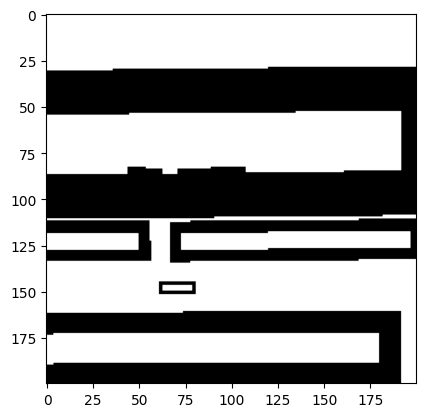

In [18]:
plt.imshow(tr_mask[100:300, 1300:1500], cmap='Greys_r')
plt.show()

In [7]:
new_sc, tr_new = my_gen(img.shape[:2], np.transpose(points, (2, 0, 1)))

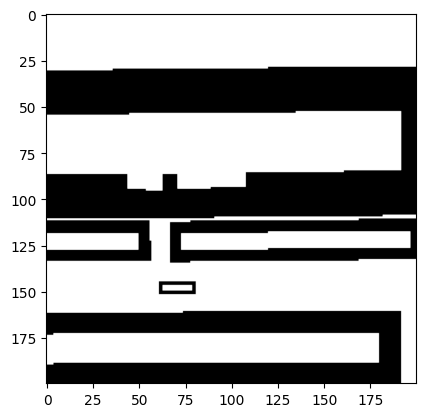

In [19]:
plt.imshow(tr_new[100:300, 1300:1500], cmap='Greys_r')
plt.show()

In [12]:
np.array_equal(tr_mask, tr_new)

False

In [17]:
np.count_nonzero(tr_mask!=tr_new)

1406

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
k = cv2.fillPoly(img, pts=points.astype(np.int32), color=(0, 0, 0))
resized_img = cv2.resize(img, (1280, 720)) # NOTE: Resize image to fit in the screen. Otherwise, I must find how to enable the cv2.window_normal option

In [ ]:
cv2.imshow('a name', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()